In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company['Sales_Range'] = pd.cut(company.Sales,bins=[0,3,6,10,14,20],
                                     labels=['Poor','Below_Avg','Avg','Above_Avg','Outstanding'],include_lowest=True)

In [6]:
label_encoder = preprocessing.LabelEncoder()
company_data = company[['ShelveLoc', 'Urban','US']].apply(label_encoder.fit_transform)
company_data = company_data.rename(columns={'ShelveLoc':'ShelveLoc_num', 'Urban':'Urban_num','US':'US_num'})

In [7]:
company_data.head()

ShelveLoc_num  Urban_num  US_num
0              0          1       1
1              1          1       1
2              2          1       1
3              2          1       1
4              0          1       0

In [8]:
company_data = pd.concat([company,company_data], axis=1, sort=False)
company_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_Range  ShelveLoc_num  Urban_num  US_num  
0         17   Yes  Yes         Avg              0          1       1  
1         10   Yes  Yes   Above_Avg              1          1       1  
2         12   Yes  Yes   Above_Avg              2          1       1  
3         14   Yes  Yes         Avg              2          1       1  
4         13   Yes   No   Below_Avg              0          1       0

In [9]:
company_data =company_data.drop(columns={'Sales','ShelveLoc','Urban','US'},axis=1)

In [10]:
company_data = company_data[["CompPrice","Income","Advertising","Population","Price","Age",
                             "Education","ShelveLoc_num","Urban_num","US_num","Sales_Range"]]

In [11]:
company_data.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_num  Urban_num  US_num Sales_Range  
0              0          1       1         Avg  
1              1          1       1   Above_Avg  
2              2          1       1   Above_Avg  
3              2          1       1         Avg  
4              0          1       0   Below_Avg

In [12]:
colnames=list(company_data.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_num',
 'Urban_num',
 'US_num',
 'Sales_Range']

In [13]:
company_data['Sales_Range'].unique()

['Avg', 'Above_Avg', 'Below_Avg', 'Outstanding', 'Poor']
Categories (5, object): ['Poor' < 'Below_Avg' < 'Avg' < 'Above_Avg' < 'Outstanding']

In [14]:
company_data.Sales_Range.value_counts()

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64

In [15]:
company_data.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
Age              0
Education        0
ShelveLoc_num    0
Urban_num        0
US_num           0
Sales_Range      0
dtype: int64

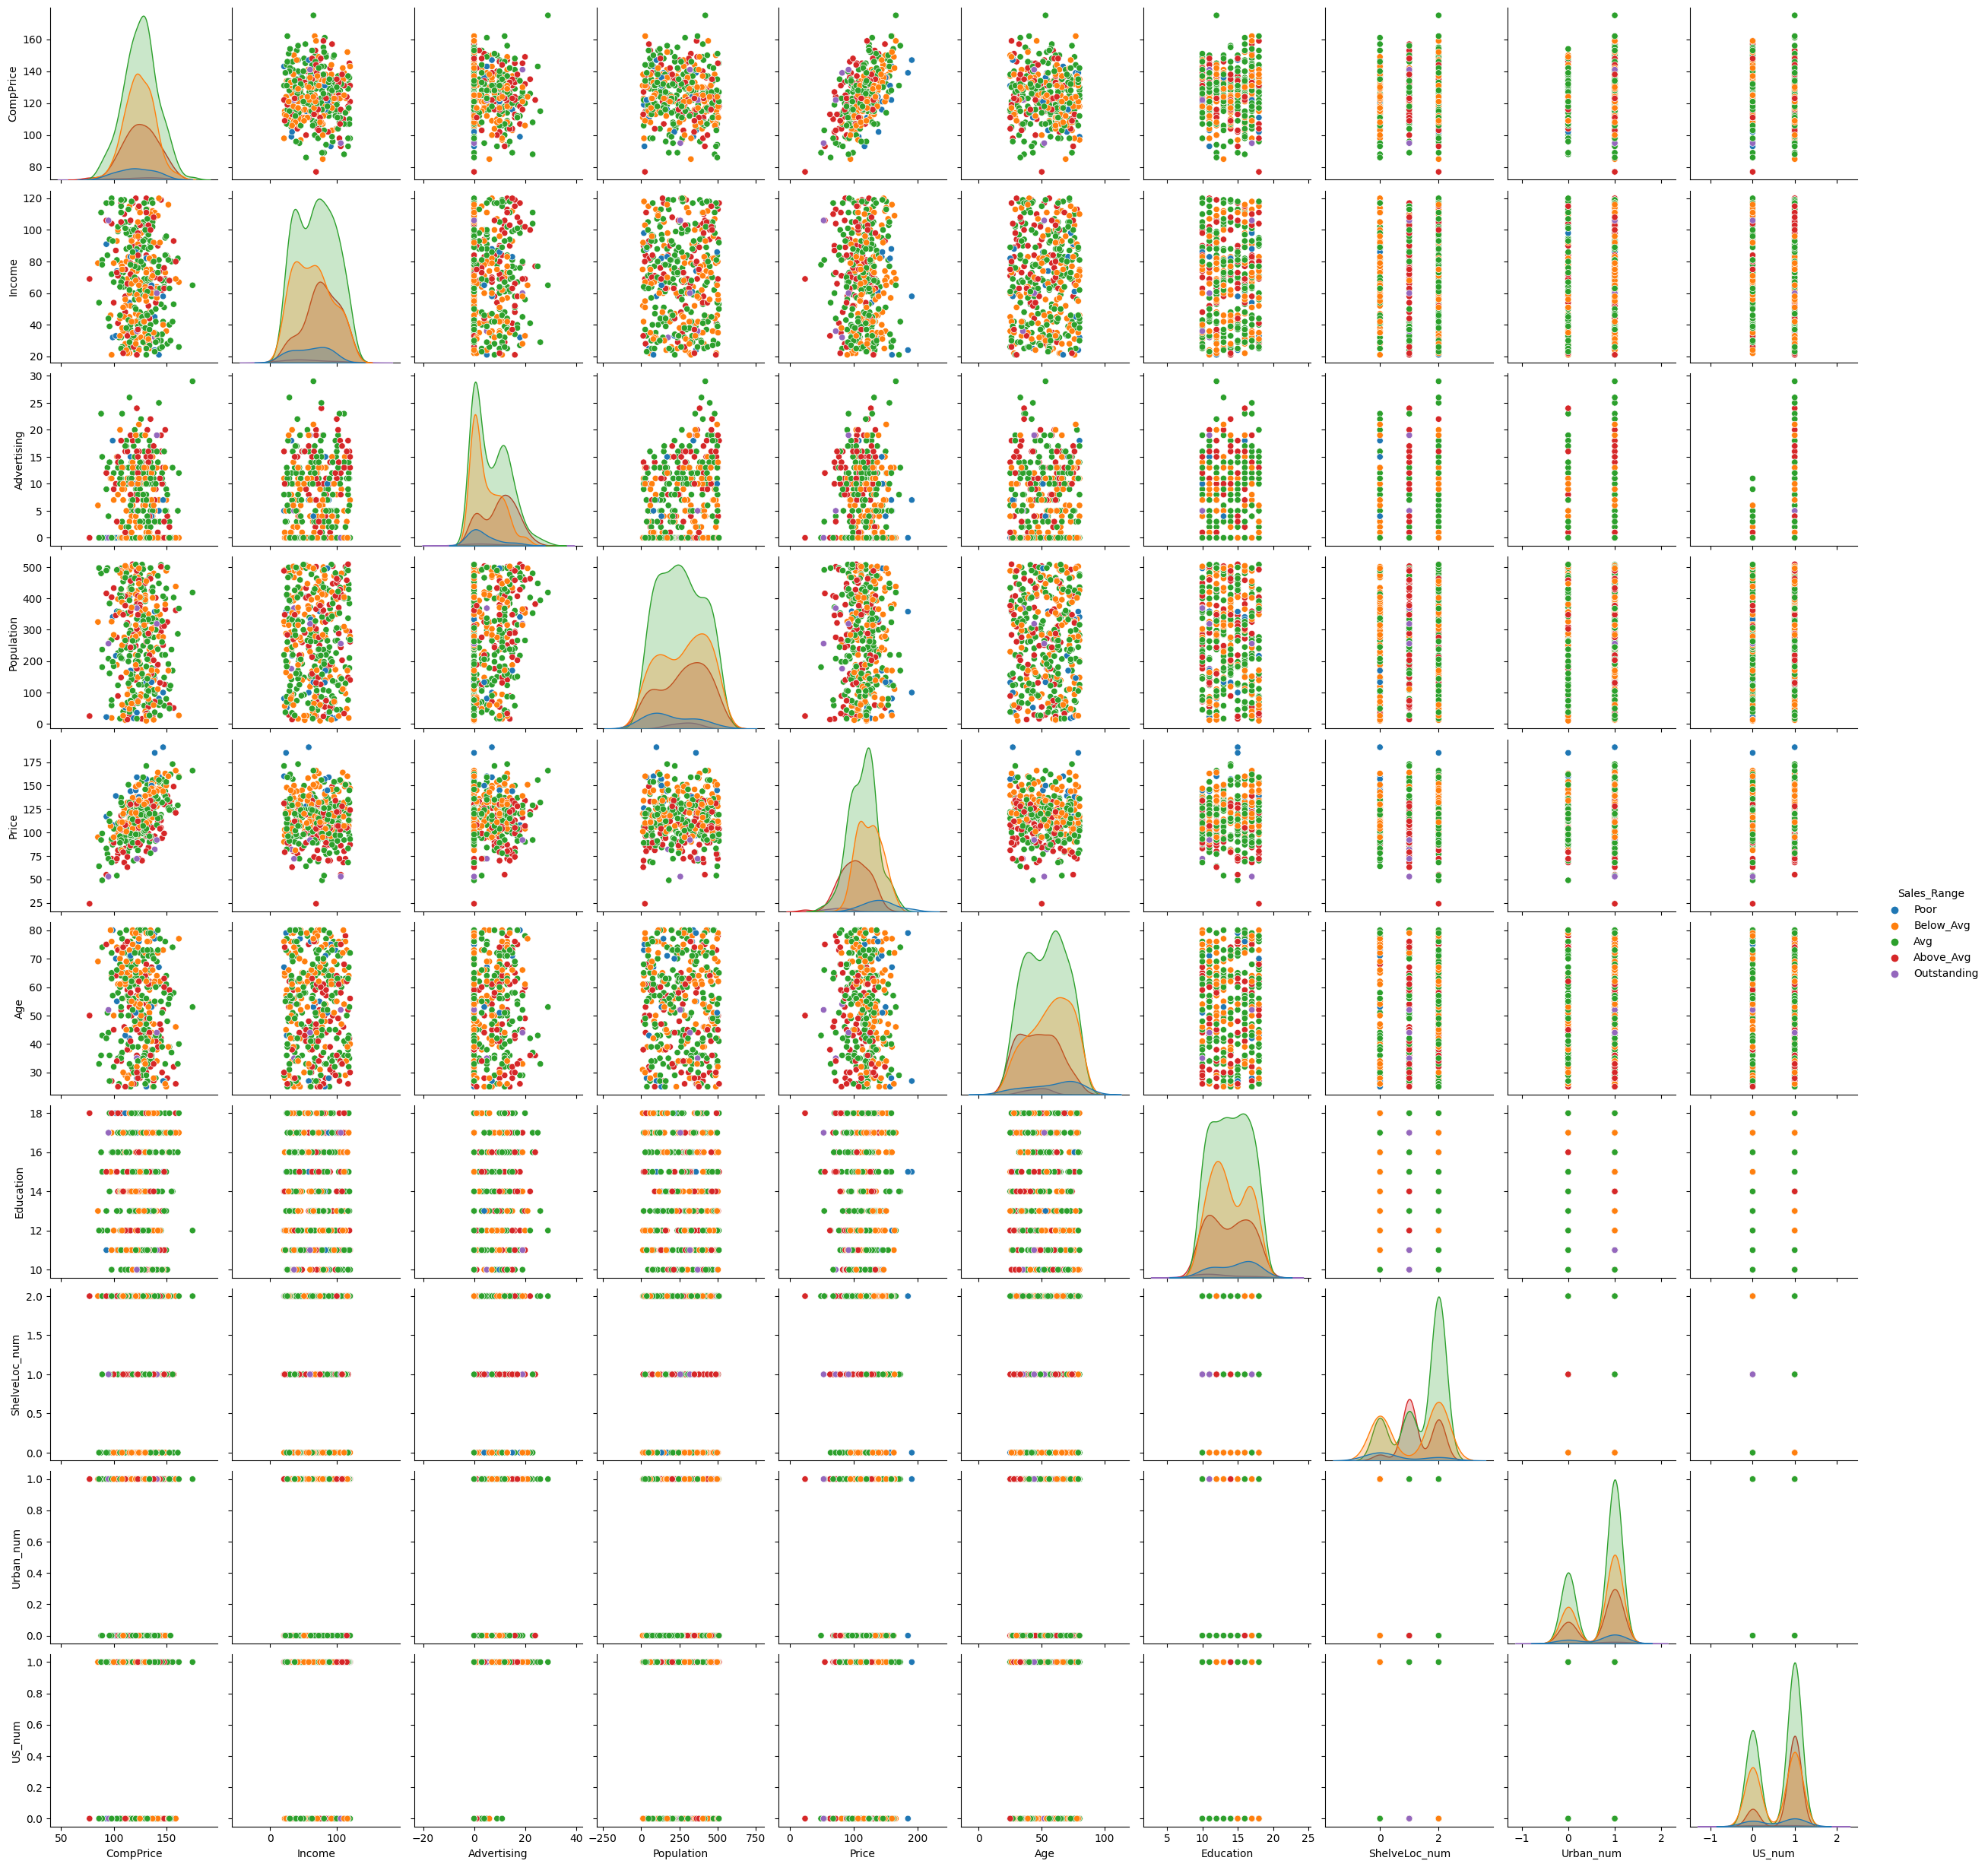

In [16]:
import seaborn as sns
sns.pairplot(company_data,hue='Sales_Range')

In [17]:
x=company_data.iloc[:,0:10]
y=company_data['Sales_Range']

In [18]:
x

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_num  Urban_num  US_num  
0                0          1       1  
1                1          1       1  
2                2          1       1  
3                2          1       1  
4                0          1       0  
..             ...        ...     ...  
395              1          1       1  
396              2          0       1  
397              2          1       1  
398              0          1       1  
399              1          1       1  

[400 rows x 10 columns]

In [19]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

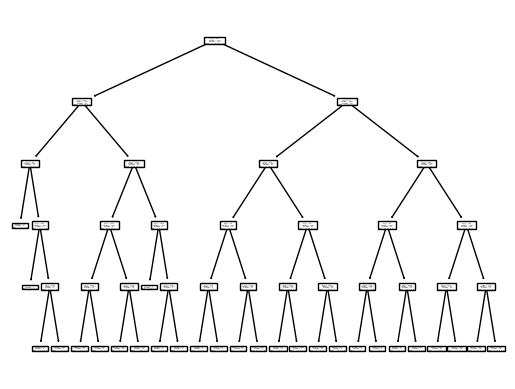

In [21]:
tree.plot_tree(model);

In [22]:
fn=['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_num',
 'Urban_num',
 'US_num']
cn=['Poor','Below_Avg','Avg','Above_Avg','Outstanding']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2.5,2.5), dpi=5000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
preds = model.predict(x_test)  
pd.Series(preds).value_counts() 

Avg            40
Above_Avg      18
Below_Avg      18
Outstanding     3
Poor            1
dtype: int64

In [24]:
preds

array(['Above_Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg', 'Above_Avg',
       'Avg', 'Avg', 'Outstanding', 'Avg', 'Avg', 'Avg', 'Avg',
       'Above_Avg', 'Below_Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg',
       'Above_Avg', 'Above_Avg', 'Avg', 'Above_Avg', 'Avg', 'Below_Avg',
       'Above_Avg', 'Below_Avg', 'Above_Avg', 'Above_Avg', 'Avg', 'Avg',
       'Outstanding', 'Avg', 'Avg', 'Avg', 'Above_Avg', 'Below_Avg',
       'Below_Avg', 'Avg', 'Avg', 'Below_Avg', 'Below_Avg', 'Avg', 'Avg',
       'Above_Avg', 'Below_Avg', 'Avg', 'Avg', 'Below_Avg', 'Below_Avg',
       'Avg', 'Above_Avg', 'Avg', 'Above_Avg', 'Outstanding', 'Avg',
       'Avg', 'Avg', 'Below_Avg', 'Below_Avg', 'Avg', 'Above_Avg', 'Avg',
       'Below_Avg', 'Avg', 'Above_Avg', 'Below_Avg', 'Poor', 'Above_Avg',
       'Above_Avg', 'Above_Avg', 'Avg', 'Avg', 'Avg', 'Avg', 'Below_Avg',
       'Avg', 'Avg', 'Below_Avg'], dtype=object)

In [25]:
pd.crosstab(y_test,preds)

col_0        Above_Avg  Avg  Below_Avg  Outstanding  Poor
Sales_Range                                              
Poor                 0    0          4            0     0
Below_Avg            1   12         10            0     0
Avg                 11   23          4            0     1
Above_Avg            6    5          0            3     0

In [26]:
np.mean(preds==y_test)

0.4875

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

In [29]:
model.fit(x_train, y_train);

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [30]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 9,  4,  0,  1,  0],
       [ 8, 26,  5,  0,  0],
       [ 0, 11, 12,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0]])

In [31]:
accuracy_score(y_test,model.predict(x_test))

0.5875

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
num_trees = 400
max_features = 4
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [34]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=400)

In [35]:
accuracy_score(y_test,model.predict(x_test))

0.5625

In [36]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 7,  7,  0,  0],
       [ 7, 29,  3,  0],
       [ 0, 14,  9,  0],
       [ 0,  1,  3,  0]])

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
num_trees = 30
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)

In [39]:
model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=30)

In [40]:
accuracy_score(y_test,model.predict(x_test))

0.5

In [41]:
confusion_matrix(y_test,model.predict(x_test))

array([[ 5,  9,  0,  0],
       [ 7, 29,  3,  0],
       [ 0, 17,  6,  0],
       [ 0,  3,  1,  0]])